In [172]:
# Jump-Start Example: Python analysis of MSPA Software Survey

# Update 2017-09-21 by Tom Miller and Kelsey O'Neill
# Update 2018-06-30 by Tom Miller v005 transformation code added

# tested under Python 3.6.1 :: Anaconda custom (x86_64)
# on Windows 10.0 and Mac OS Sierra 10.12.2 

# shows how to read in data from a comma-delimited text file
# manipuate data, create new count variables, define categorical variables,
# work with dictionaries and lambda mapping functions for recoding data 

# visualizations in this program are routed to external pdf files
# so they may be included in printed or electronic reports

# prepare for Python version 3x features and functions
# these two lines of code are needed for Python 2.7 only
# commented out for Python 3.x versions
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
import os 
import reportlab 

os.getcwd()
os.chdir('C:\\Users\\R\\Desktop\\MSDS 422\\Labs\\mspa-software-survey-case-python-v005')

In [45]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

In [ ]:
# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address

import pandas
df = pandas.read_csv('mspa-survey-data.csv')
valid_survey_input = pd.read_csv('mspa-survey-data.csv')

# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

# examine the structure of the DataFrame object
print('\nContents of initial survey data ---------------')

In [29]:
# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 

# show the column/variable names of the DataFrame

# note that RespondentID is no longer present
print(valid_survey_input.columns)


Number of Respondents = 207
Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


In [157]:
# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(valid_survey_input)) 

SyntaxError: invalid character in identifier (<ipython-input-157-c40475546d48>, line 4)

In [22]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})
    

In [ ]:
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']

#remove outliers from software preferences data frame
software_df_new = software_df[np.abs(software_df - software_df.mean()) <= (3 * software_df.std())]

 

In [31]:
#define subset DataFrame for analysis of courses completed
courses_completed_df = survey_df.loc[:, 'PREDICT453': 'PREDICT457'].dropna(how='all')

In [39]:
#define subset DataFrame for analysis of potential new course preference
new_course_interest_df = survey_df.loc[:, 'Python_Course_Interest': 'Systems_Analysis_Course_Interest'].dropna(how='all')

#remove outliers from potential new course preference data frame
new_course_interest_df_new = new_course_interest_df[np.abs(new_course_interest_df - new_course_interest_df.mean()) <= (3 * new_course_interest_df.std())]


#calculate summary statistics of software preferences
software_df_new.describe()
print(software_df_new.describe())


In [68]:
#calculate skewness of distribution for software preferences
software_df_new.skew()
print(software_df_new.skew())

My_Java        0.820779
My_JS          1.294404
My_Python      0.134451
My_R           0.463573
My_SAS         0.607400
Prof_Java      1.183081
Prof_JS        1.415324
Prof_Python    0.213336
Prof_R         0.544784
Prof_SAS       0.557521
Ind_Java       1.202834
Ind_JS         1.170725
Ind_Python     0.453134
Ind_R          0.224720
Ind_SAS        0.940553
dtype: float64


In [69]:
#calculate kurtosis of distribution for software preferences
software_df_new.kurtosis()
print(software_df_new.kurtosis())

My_Java       -0.324585
My_JS          0.744238
My_Python      0.525072
My_R           0.215963
My_SAS        -0.059792
Prof_Java      0.563040
Prof_JS        0.948072
Prof_Python   -0.193210
Prof_R         0.810462
Prof_SAS      -0.800447
Ind_Java       0.768751
Ind_JS         0.149174
Ind_Python     0.586145
Ind_R          0.475077
Ind_SAS        0.307182
dtype: float64


In [78]:
#calculate summary statistics of potential new course preference
new_course_interest_df_new.describe()
print(new_course_interest_df_new.describe())

       Python_Course_Interest  Foundations_DE_Course_Interest  \
count              206.000000                      200.000000   
mean                73.529126                       58.045000   
std                 29.835429                       32.588079   
min                  0.000000                        0.000000   
25%                 53.000000                       29.500000   
50%                 82.500000                       60.000000   
75%                100.000000                       89.250000   
max                100.000000                      100.000000   

       Analytics_App_Course_Interest  Systems_Analysis_Course_Interest  
count                     203.000000                        200.000000  
mean                       55.201970                         53.630000  
std                        34.147954                         33.539493  
min                         0.000000                          0.000000  
25%                        25.000000             

In [71]:
#calculate skewness of distribution for potential new course preference
new_course_interest_df_new.skew()
print(new_course_interest_df_new.skew())

Python_Course_Interest             -1.037244
Foundations_DE_Course_Interest     -0.238404
Analytics_App_Course_Interest      -0.147260
Systems_Analysis_Course_Interest   -0.060118
dtype: float64


In [72]:
#calculate kurtosis of distribution for potential new course preference
new_course_interest_df_new.kurtosis()
print(new_course_interest_df_new.kurtosis())

Python_Course_Interest             -0.037741
Foundations_DE_Course_Interest     -1.192089
Analytics_App_Course_Interest      -1.397004
Systems_Analysis_Course_Interest   -1.343501
dtype: float64


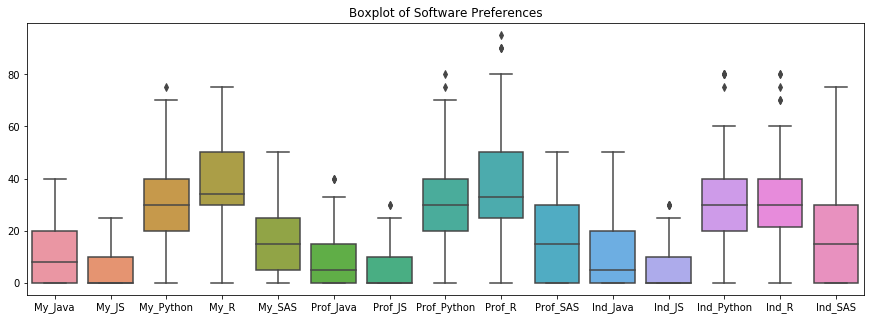

In [169]:
#create a boxplot for software preferences
plt.figure(figsize = (15,5))
sns.boxplot(data=software_df_new)
plt.title("Boxplot of Software Preferences")
plt.show()
plt.close()

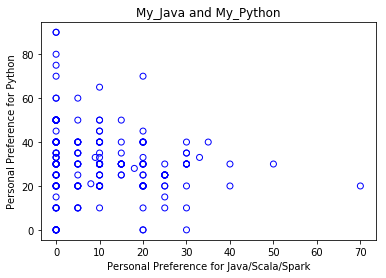

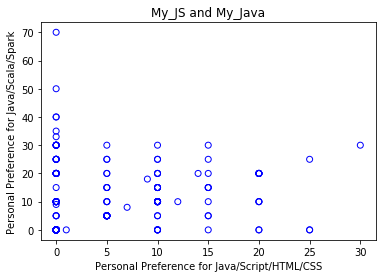

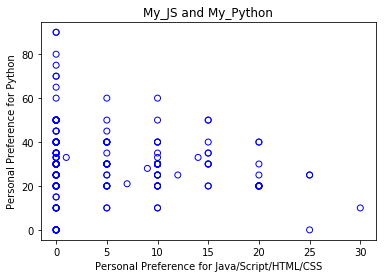

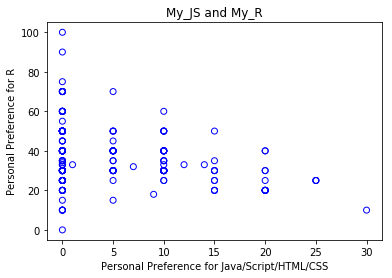

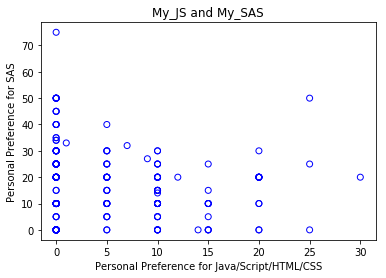

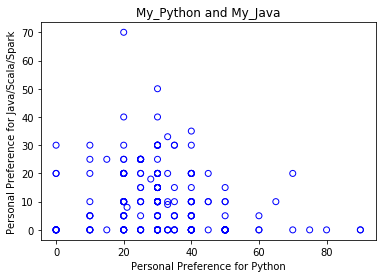

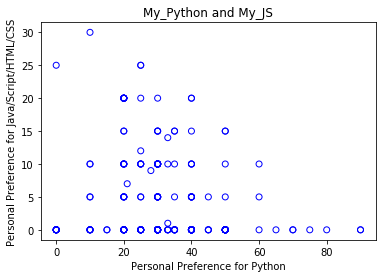

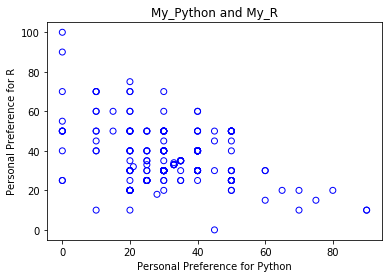

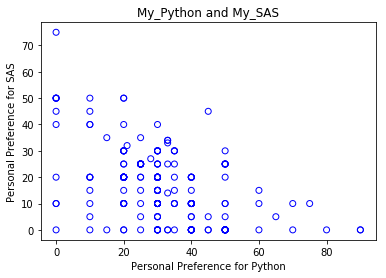

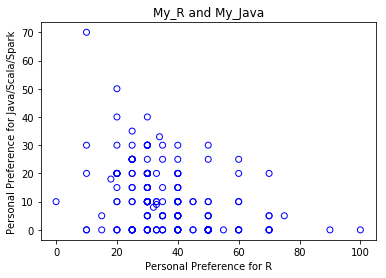

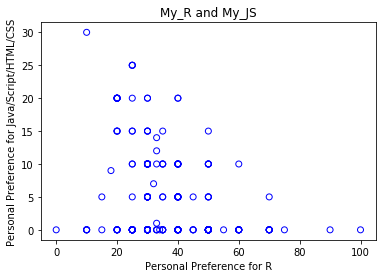

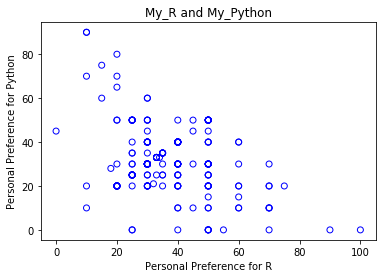

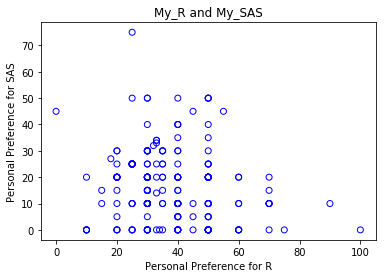

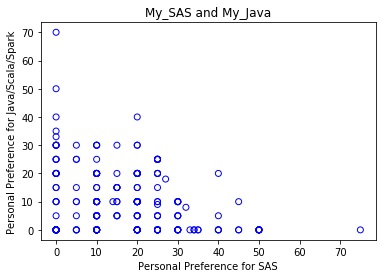

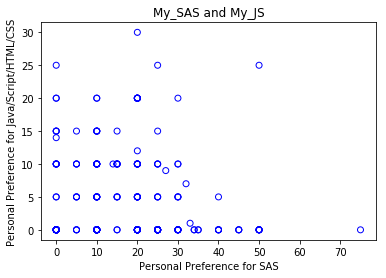

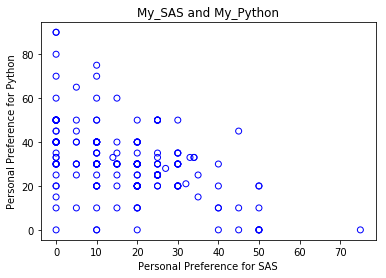

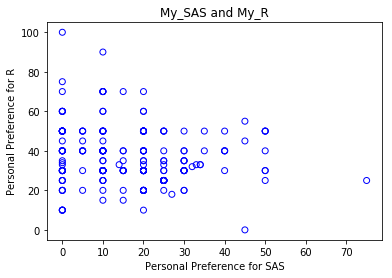

In [56]:
# create a set of scatter plots for personal software preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  

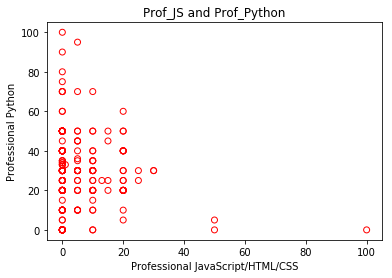

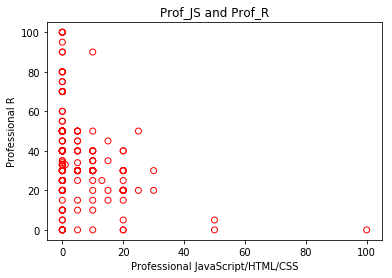

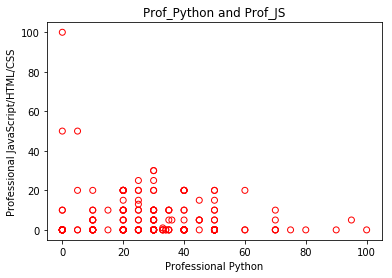

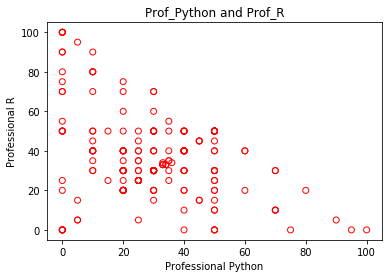

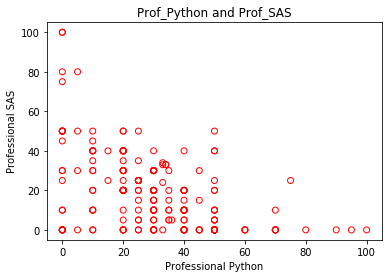

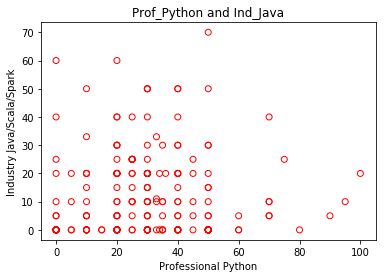

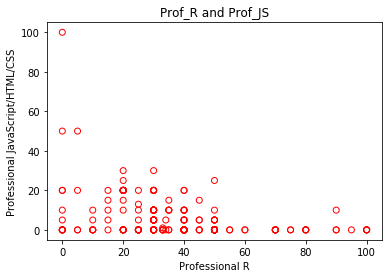

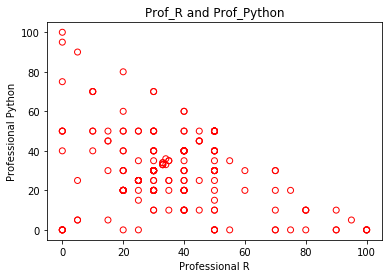

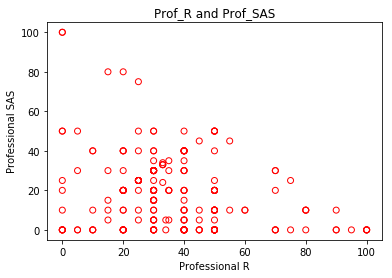

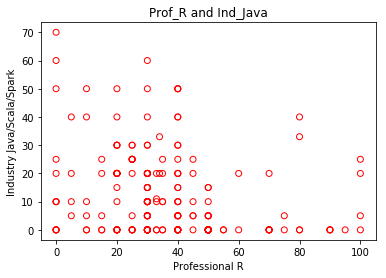

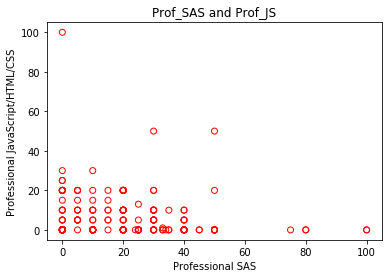

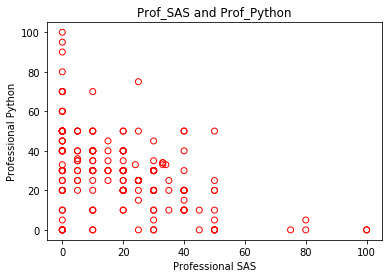

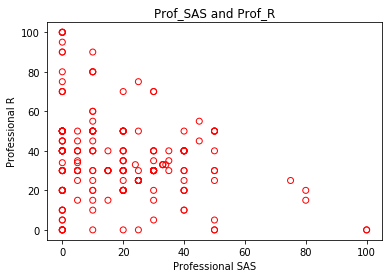

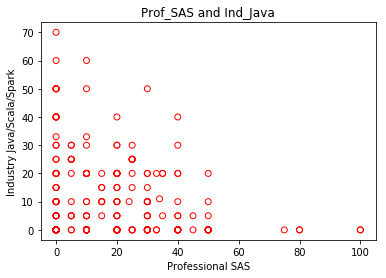

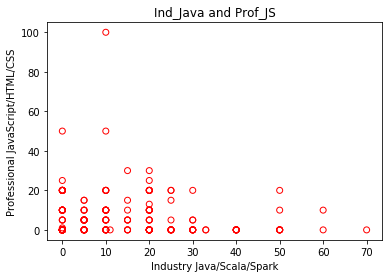

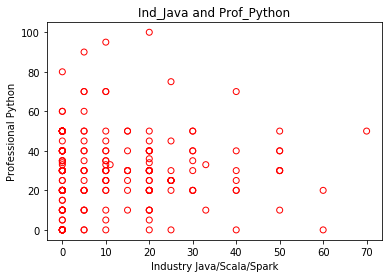

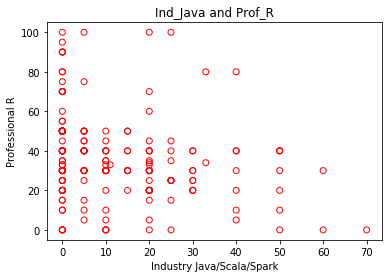

In [73]:
#create a set of scatter plots for professional software preferences

for i in range(6,11):
    for j in range(6,11):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'red') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  

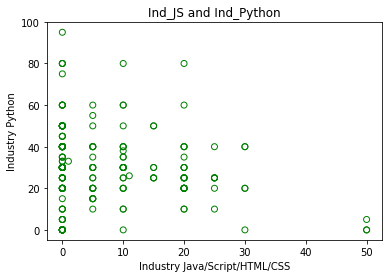

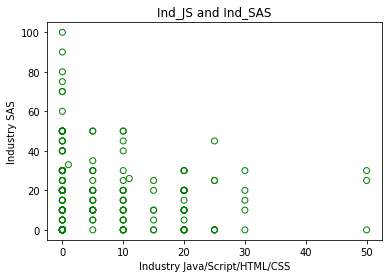

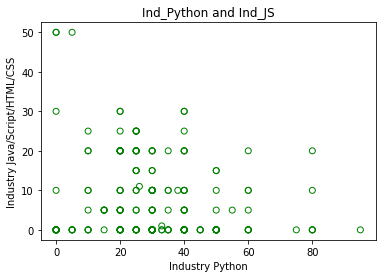

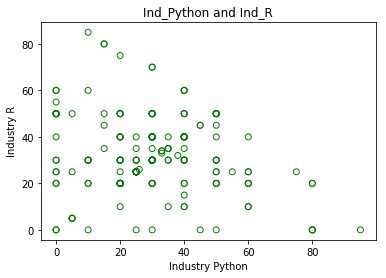

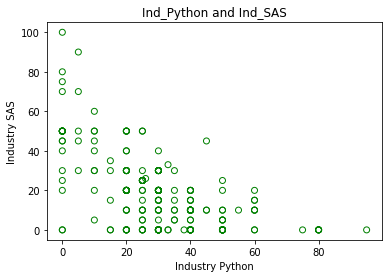

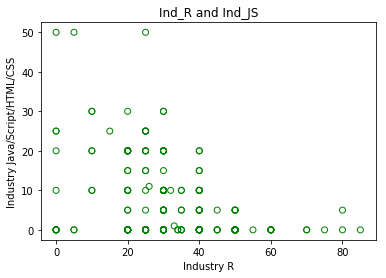

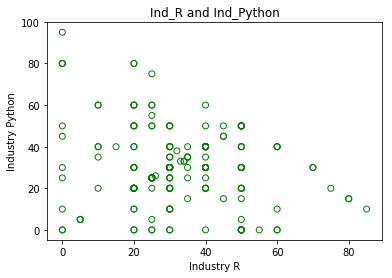

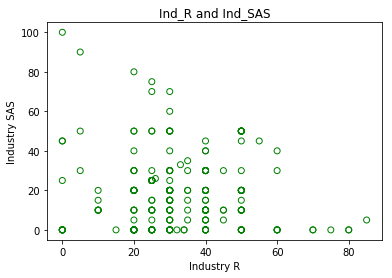

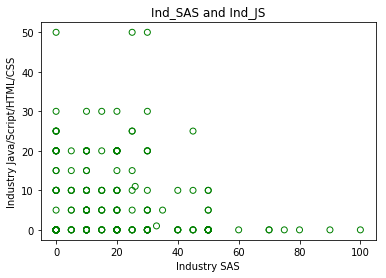

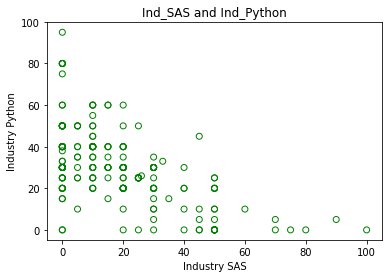

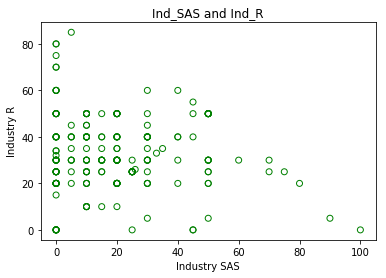

In [76]:
#create a set of scatter plots for industry software preferences
for i in range(11,15):
    for j in range(11,15):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'green') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  

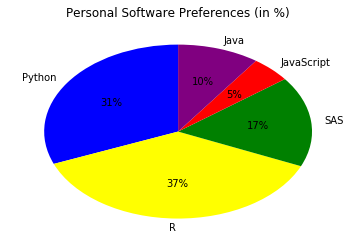

In [112]:
#calculate totals for personal software preferences
my_python_preference = software_df_new['My_Python'].sum()
my_r_preference = software_df_new['My_R'].sum()
my_sas_preference = software_df_new['My_SAS'].sum()
my_js_preference = software_df_new['My_JS'].sum()
my_java_preference = software_df_new['My_Java'].sum()

#calculate total value for personal software preferences
my_software_preference_total = my_python_preference + my_r_preference + my_sas_preference + my_js_preference + my_java_preference

#calculate total personal software preference percentages 
my_python_percentage = my_python_preference/my_software_preference_total *100
my_r_percentage = my_r_preference/my_software_preference_total *100
my_sas_percentage = my_sas_preference/my_software_preference_total *100
my_js_percentage = my_js_preference/my_software_preference_total *100
my_java_percentage = my_java_preference/my_software_preference_total *100

#create variable for total personal software preferences
total_personal_software_percentages = my_python_percentage, my_r_percentage, my_sas_percentage, my_js_percentage, my_java_percentage

#create a pie chart to visualize personal software preferences
labels = ['Python','R','SAS','JavaScript','Java']
colors = ['blue','yellow','green','red','purple']
plt.pie(total_personal_software_percentages, labels = labels, colors = colors, startangle = 90, autopct='%1.0f%%')
plt.title("Personal Software Preferences (in %)")
plt.show()

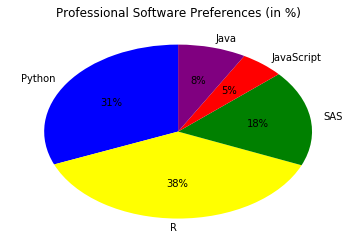

In [113]:
#calculate totals for professional software preferences
prof_python_preference = software_df_new['Prof_Python'].sum()
prof_r_preference = software_df_new['Prof_R'].sum()
prof_sas_preference = software_df_new['Prof_SAS'].sum()
prof_js_preference = software_df_new['Prof_JS'].sum()
prof_java_preference = software_df_new['Prof_Java'].sum()

#calculate total value for professional software preferences
prof_software_preference_total = prof_python_preference + prof_r_preference + prof_sas_preference + prof_js_preference + prof_java_preference

#calculate total personal software preference percentages 
prof_python_percentage = prof_python_preference/prof_software_preference_total *100
prof_r_percentage = prof_r_preference/prof_software_preference_total *100
prof_sas_percentage = prof_sas_preference/prof_software_preference_total *100
prof_js_percentage = prof_js_preference/prof_software_preference_total *100
prof_java_percentage = prof_java_preference/prof_software_preference_total *100

#create variable for total professional software preferences
total_prof_software_percentages = prof_python_percentage, prof_r_percentage, prof_sas_percentage, prof_js_percentage, prof_java_percentage

#create a pie chart to visualize professional software preferences
labels = ['Python','R','SAS','JavaScript','Java']
colors = ['blue','yellow','green','red','purple']
plt.pie(total_prof_software_percentages, labels = labels, colors = colors, startangle = 90, autopct='%1.0f%%')
plt.title("Professional Software Preferences (in %)") 
plt.show()

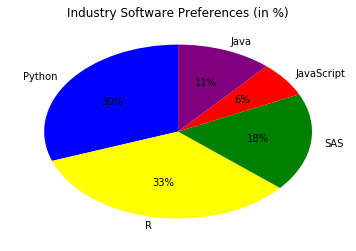

In [114]:
#calculate totals for indsutry software preferences
ind_python_preference = software_df_new['Ind_Python'].sum()
ind_r_preference = software_df_new['Ind_R'].sum()
ind_sas_preference = software_df_new['Ind_SAS'].sum()
ind_js_preference = software_df_new['Ind_JS'].sum()
ind_java_preference = software_df_new['Ind_Java'].sum()

#calculate total value for professional software preferences
ind_software_preference_total = ind_python_preference + ind_r_preference + ind_sas_preference + ind_js_preference + ind_java_preference

#calculate personal software preference percentages 
ind_python_percentage = ind_python_preference/ind_software_preference_total *100
ind_r_percentage = ind_r_preference/ind_software_preference_total *100
ind_sas_percentage = ind_sas_preference/ind_software_preference_total *100
ind_js_percentage = ind_js_preference/ind_software_preference_total *100
ind_java_percentage = ind_java_preference/ind_software_preference_total *100

#create variable for total professional software preferences
total_ind_software_percentages = ind_python_percentage, ind_r_percentage, ind_sas_percentage, ind_js_percentage, ind_java_percentage

#create a pie chart to visualize industry software preferences
labels = ['Python','R','SAS','JavaScript','Java']
colors = ['blue','yellow','green','red','purple']
plt.pie(total_ind_software_percentages, labels = labels, colors = colors, startangle = 90, autopct='%1.0f%%')
plt.title("Industry Software Preferences (in %)") 
plt.show()

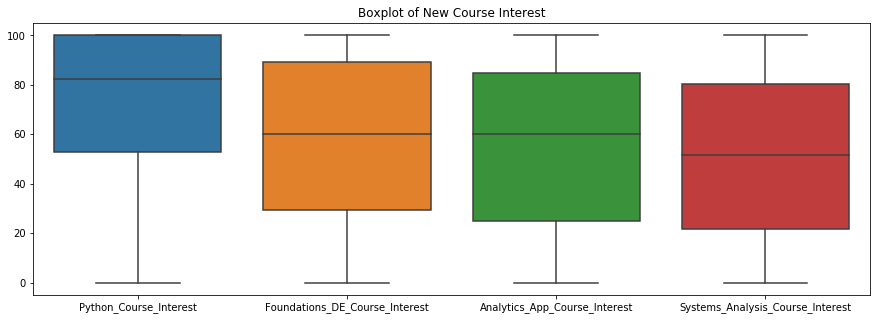

In [164]:
#create a boxplot of new course interests
plt.figure(figsize = (15,5))
sns.boxplot(data=new_course_interest_df_new)
plt.title("Boxplot of New Course Interest")
plt.show()
plt.close()

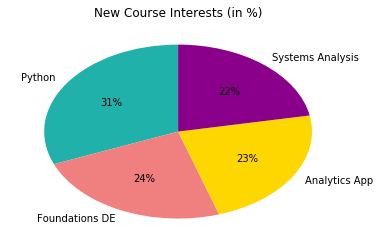

In [117]:
#calculate totals for new course preferences
course_interest_python_total = survey_df['Python_Course_Interest'].sum()
course_interest_foundations_de_total = survey_df['Foundations_DE_Course_Interest'].sum()
course_interest_analytics_app_total = survey_df['Analytics_App_Course_Interest'].sum()
course_interest_systems_analysis_total = survey_df['Systems_Analysis_Course_Interest'].sum()

#calculate total value of new course preferences
total_course_interest_value = course_interest_python_total + course_interest_foundations_de_total + course_interest_analytics_app_total + course_interest_systems_analysis_total

#calculate new course interest percentages
course_interest_python_percentage = course_interest_python_total/total_course_interest_value *100 
course_interest_foundations_de_percentage = course_interest_foundations_de_total/total_course_interest_value *100
course_interest_analytics_app_percentage = course_interest_analytics_app_total/total_course_interest_value *100
course_interest_systems_analysis_percentage = course_interest_systems_analysis_total/total_course_interest_value *100

#create a new variable for total course interest percentages
new_course_interest_percentages = course_interest_python_percentage, course_interest_foundations_de_percentage, course_interest_analytics_app_percentage, course_interest_systems_analysis_percentage

#create a pie chart to visualize course interest 
labels = ['Python','Foundations DE','Analytics App','Systems Analysis']
colors = ['lightseagreen','lightcoral','gold','darkmagenta']
plt.pie(new_course_interest_percentages, labels = labels, colors = colors, startangle = 90, autopct='%1.0f%%')
plt.title("New Course Interests (in %)") 
plt.show()

In [134]:
#create variables for participants differentiated by graduation year
grad_year_2017_or_earlier = survey_df[(survey_df.Graduate_Date =='Fall 2017') | (survey_df.Graduate_Date == 'Fall 2016') | (survey_df.Graduate_Date == 'Winter 2017') | (survey_df.Graduate_Date == 'Summer 2017') | (survey_df.Graduate_Date == 'Spring 2017')]
grad_year_2018 = survey_df[(survey_df.Graduate_Date =='Fall 2018') | (survey_df.Graduate_Date == 'Winter 2018') | (survey_df.Graduate_Date == 'Spring 2018') | (survey_df.Graduate_Date == 'Summer 2018')]
grad_year_2019_or_later = survey_df[(survey_df.Graduate_Date =='Fall 2019') | (survey_df.Graduate_Date == 'Winter 2019') | (survey_df.Graduate_Date == 'Spring 2019') | (survey_df.Graduate_Date == 'Summer 2019') | (survey_df.Graduate_Date == '2020 or Later')]

In [ ]:
#calculate summary statistics for particpants graduating in 2017 or earlier
print(grad_year_2017_or_earlier.describe())

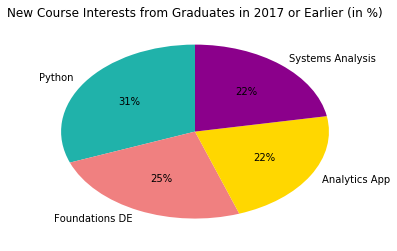

In [141]:
#calculate potential course interest for 2017 or earlier graduates 
course_interest_python_2017 = grad_year_2017_or_earlier['Python_Course_Interest'].sum()
course_interest_foundations_de_2017 = grad_year_2017_or_earlier['Foundations_DE_Course_Interest'].sum()
course_interest_analytics_app_2017 = grad_year_2017_or_earlier['Analytics_App_Course_Interest'].sum()
course_interest_systems_analysis_2017 = grad_year_2017_or_earlier['Systems_Analysis_Course_Interest'].sum()

#calculate total value of potential new course interests from 2017 or earlier graduates
total_course_interest_value_2017 = course_interest_python_2017 + course_interest_foundations_de_2017 + course_interest_analytics_app_2017 + course_interest_systems_analysis_2017

#calculate new course interest percentages
course_interest_python_percentage_2017 = course_interest_python_2017/total_course_interest_value_2017 *100 
course_interest_foundations_de_percentage_2017 = course_interest_foundations_de_2017/total_course_interest_value_2017 *100
course_interest_analytics_app_percentage_2017 = course_interest_analytics_app_2017/total_course_interest_value_2017 *100
course_interest_systems_analysis_percentage_2017 = course_interest_systems_analysis_2017/total_course_interest_value_2017 *100


#create a new variable of total course interest percentages for 2017 or earlier graduates
new_course_interest_percentages_2017 = course_interest_python_percentage_2017, course_interest_foundations_de_percentage_2017, course_interest_analytics_app_percentage_2017, course_interest_systems_analysis_percentage_2017

#create pie chart to visualize course interest from 2017 or earlier graduates
labels = ['Python','Foundations DE','Analytics App','Systems Analysis']
colors = ['lightseagreen','lightcoral','gold','darkmagenta']
plt.pie(new_course_interest_percentages_2017, labels = labels, colors = colors, startangle = 90, autopct='%1.0f%%')
plt.title("New Course Interests from Graduates in 2017 or Earlier (in %)") 
plt.show()

In [136]:
#calculate summary statistics for participants graduating in 2018
print(grad_year_2018.describe())

         My_Java      My_JS  My_Python       My_R     My_SAS  Prof_Java  \
count  86.000000  86.000000  86.000000  86.000000  86.000000  86.000000   
mean    8.697674   5.162791  29.709302  37.616279  18.813953   7.500000   
std     9.498074   6.933059  15.361423  13.247125  14.966246  10.196597   
min     0.000000   0.000000   0.000000  15.000000   0.000000   0.000000   
25%     0.000000   0.000000  20.000000  30.000000  10.000000   0.000000   
50%     5.000000   0.000000  30.000000  40.000000  20.000000   2.500000   
75%    15.000000  10.000000  40.000000  40.000000  29.250000  10.000000   
max    40.000000  25.000000  80.000000  75.000000  75.000000  50.000000   

         Prof_JS  Prof_Python      Prof_R    Prof_SAS   Ind_Java     Ind_JS  \
count  86.000000    86.000000   86.000000   86.000000  86.000000  86.000000   
mean    6.232558    28.848837   36.988372   20.430233  10.976744   8.511628   
std     9.783148    17.848722   20.260941   20.204566  13.371591  11.189012   
min     

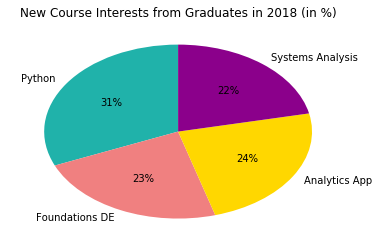

In [142]:
#calculate potential course interest for 2018 graduates 
course_interest_python_2018 = grad_year_2018['Python_Course_Interest'].sum()
course_interest_foundations_de_2018 = grad_year_2018['Foundations_DE_Course_Interest'].sum()
course_interest_analytics_app_2018 = grad_year_2018['Analytics_App_Course_Interest'].sum()
course_interest_systems_analysis_2018 = grad_year_2018['Systems_Analysis_Course_Interest'].sum()

#calculate total value of potential new course interests from 2018 graduates
total_course_interest_value_2018 = course_interest_python_2018 + course_interest_foundations_de_2018 + course_interest_analytics_app_2018 + course_interest_systems_analysis_2018

#calculate new course interest percentages
course_interest_python_percentage_2018 = course_interest_python_2017/total_course_interest_value_2018 *100 
course_interest_foundations_de_percentage_2018 = course_interest_foundations_de_2018/total_course_interest_value_2018 *100
course_interest_analytics_app_percentage_2018 = course_interest_analytics_app_2018/total_course_interest_value_2018 *100
course_interest_systems_analysis_percentage_2018 = course_interest_systems_analysis_2018/total_course_interest_value_2018 *100


#create a new variable of total course interest percentages for 2018 graduates
new_course_interest_percentages_2018 = course_interest_python_percentage_2018, course_interest_foundations_de_percentage_2018, course_interest_analytics_app_percentage_2018, course_interest_systems_analysis_percentage_2018

#create pie chart to visualize course interest from 2018 graduates
labels = ['Python','Foundations DE','Analytics App','Systems Analysis']
colors = ['lightseagreen','lightcoral','gold','darkmagenta']
plt.pie(new_course_interest_percentages_2018, labels = labels, colors = colors, startangle = 90, autopct='%1.0f%%')
plt.title("New Course Interests from Graduates in 2018 (in %)") 
plt.show()

In [135]:
#calculate summary statistics for participants graduating in 2019 or later
print(grad_year_2019_or_later.describe())

         My_Java      My_JS  My_Python       My_R     My_SAS  Prof_Java  \
count  33.000000  33.000000  33.000000  33.000000  33.000000  33.000000   
mean   12.060606   6.212121  32.606061  36.424242  12.696970  13.484848   
std    11.876814   8.841513  11.651018  12.976012  10.534126  18.012359   
min     0.000000   0.000000  10.000000  10.000000   0.000000   0.000000   
25%     0.000000   0.000000  25.000000  30.000000   0.000000   0.000000   
50%    10.000000   0.000000  30.000000  33.000000  10.000000   5.000000   
75%    20.000000  10.000000  40.000000  50.000000  20.000000  20.000000   
max    35.000000  30.000000  50.000000  70.000000  40.000000  70.000000   

         Prof_JS  Prof_Python      Prof_R   Prof_SAS   Ind_Java     Ind_JS  \
count  33.000000    33.000000   33.000000  33.000000  33.000000  33.000000   
mean    5.545455    30.515152   36.727273  13.727273  14.787879   8.030303   
std    10.314101    16.409070   20.044127  14.917005  17.586852  11.854548   
min     0.00

<bound method NDFrame.head of               My_Java  My_JS  My_Python  My_R  My_SAS  Prof_Java  Prof_JS  \
RespondentID                                                                
5131698528         20      0         40    30      10         70        0   
5129721525          0      0         50    50       0          0        0   
5129569679          5     15         35    35      10          0        5   
5128370809          0      0         40    50      10          0        0   
5128110446         30     30         10    10      20         10       50   
5127921328         30      5         30    30       5         30        5   
5126541968          0      0         30    50      20          0        0   
5126401782         25     25         25    25       0         33        0   
5126090565         10     10         25    30      25          0        0   
5125787964          0      0         20    70      10          5        5   
5124599237         15      5         30    30 

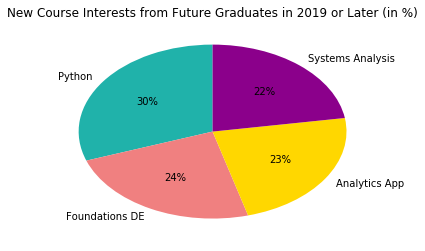

In [144]:
#calculate potential course interest for 2019 or later future graduates 
course_interest_python_2019 = grad_year_2019_or_later['Python_Course_Interest'].sum()
course_interest_foundations_de_2019 = grad_year_2019_or_later['Foundations_DE_Course_Interest'].sum()
course_interest_analytics_app_2019 = grad_year_2019_or_later['Analytics_App_Course_Interest'].sum()
course_interest_systems_analysis_2019 = grad_year_2019_or_later['Systems_Analysis_Course_Interest'].sum()

#calculate total value of potential new course interests from future 2019 or later graduates
total_course_interest_value_2019 = course_interest_python_2019 + course_interest_foundations_de_2019 + course_interest_analytics_app_2019 + course_interest_systems_analysis_2019

#calculate new course interest percentages
course_interest_python_percentage_2019 = course_interest_python_2019/total_course_interest_value_2019 *100 
course_interest_foundations_de_percentage_2019 = course_interest_foundations_de_2019/total_course_interest_value_2019 *100
course_interest_analytics_app_percentage_2019 = course_interest_analytics_app_2019/total_course_interest_value_2019 *100
course_interest_systems_analysis_percentage_2019 = course_interest_systems_analysis_2019/total_course_interest_value_2019 *100


#create a new variable of total course interest percentages for future 2019 or later graduates
new_course_interest_percentages_2019 = course_interest_python_percentage_2019, course_interest_foundations_de_percentage_2019, course_interest_analytics_app_percentage_2019, course_interest_systems_analysis_percentage_2019

#create pie chart to visualize course interest from future 2019 or later graduates
labels = ['Python','Foundations DE','Analytics App','Systems Analysis']
colors = ['lightseagreen','lightcoral','gold','darkmagenta']
plt.pie(new_course_interest_percentages_2019, labels = labels, colors = colors, startangle = 90, autopct='%1.0f%%')
plt.title("New Course Interests from Future Graduates in 2019 or Later (in %)") 
plt.show()

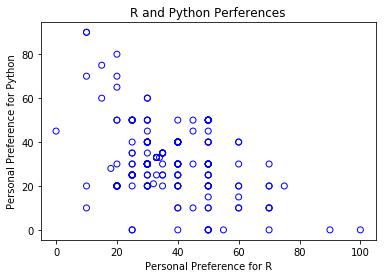

In [62]:
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
] 


Descriptive statistics for survey data ---------------
          My_Java       My_JS   My_Python        My_R      My_SAS   Prof_Java  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   
max     70.000000   30.000000   90.000000  100.000000   75.000000   80.000000   

          Prof_JS  Prof_Python      Prof_R    Prof_SAS    Ind_Java  \
count  207.000000   207.000000  207.000000  207.000000  207.000000   
mean     5.840580    30.028986   36.415459   18.463768   11.942029   
std 

<Figure size 432x288 with 0 Axes>

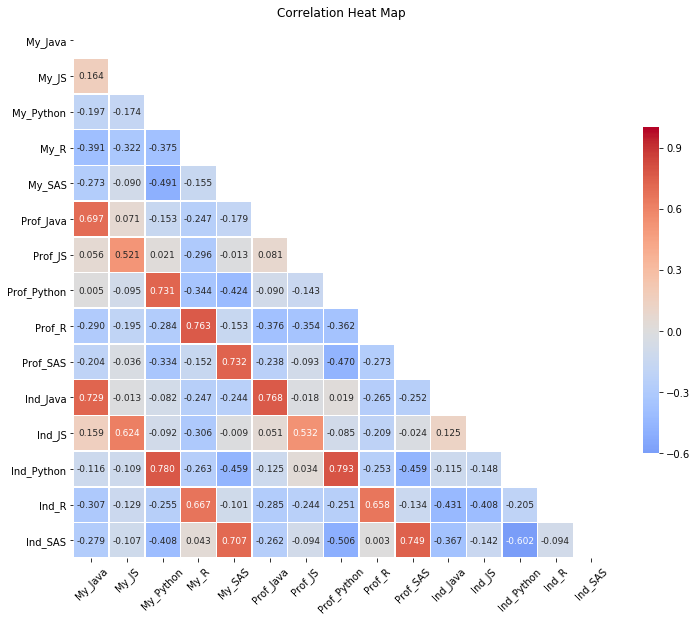

In [63]:
# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 

# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())

# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())

In [170]:
# transformation code added with version v005
# ----------------------------------------------------------
# transformations a la Scikit Learn
# documentation at http://scikit-learn.org/stable/auto_examples/
#                  preprocessing/plot_all_scaling.html#sphx-glr-auto-
#                  examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Courses_Completed'].dropna()

C:\Users\R\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ValueError: Expected 2D array, got 1D array instead:
array=[ 6.  4.  7.  7.  5. 11.  2.  3.  6.  3.  2.  7.  3.  4.  2. 12.  7.  5.
  6.  8. 12.  9. 12.  2.  3.  5.  7.  2.  9.  7.  7.  7.  1.  5.  5. 11.
  5.  6. 10.  6.  9. 10.  4.  4.  7.  5.  3.  7. 10.  7.  6.  5.  5.  3.
  6.  7.  6.  8. 10.  5.  2.  3.  7.  5.  2.  8.  4.  7.  8.  5. 11.  1.
  2. 12.  3.  7. 10.  7.  3.  2.  9.  1. 11. 10.  9.  2.  4.  6.  1.  6.
  4.  5.  1. 10. 12.  6. 10. 11.  8.  8.  3.  7. 10.  6.  8.  5. 11. 10.
  7. 11.  2.  9.  2.  9. 10. 10.  9. 11.  7.  8.  2. 10.  8.  2.  4.  5.
  2.  9.  4.  5.  2. 10.  5.  2.  9.  5. 10.  2.  2. 11.  5. 12.  2.  9.
  5.  4. 12.  2. 10.  8.  6.  3.  5. 10.  5.  7.  2.  6.  9. 11.  9. 12.
 11.  7.  3.  4.  7.  6.  5.  4.  2.  4. 12.  2.  8. 10.  7. 12. 10.  9.
  1.  2. 10.  6.  3.  5.  7.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

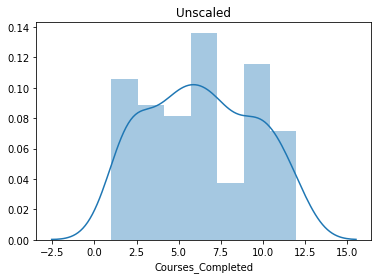

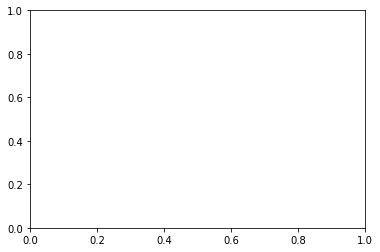

In [171]:
# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X)).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X)).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
 
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  